In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow.keras.datasets import mnist
style.use('ggplot')

C:\Users\thabu\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summary.log", "w")
sys.stdout = log_file

In [4]:
# Load MNIST Data
print('\nLoading MNIST Data...')
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

In [5]:
# Flatten images for SVM classifier
train_img = train_img.reshape((train_img.shape[0], -1))
test_img = test_img.reshape((test_img.shape[0], -1))

In [6]:
# Features and Labels
X = train_img
y = train_labels

In [7]:
# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
# Pickle the Classifier for Future Use
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
print('\nPickling the Classifier for Future Use...')
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train, y_train)

SVC(gamma=0.1, kernel='poly')

In [9]:
with open('MNIST_SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [10]:
with open('MNIST_SVM.pickle', 'rb') as pickle_in:
    clf = pickle.load(pickle_in)


Calculating Accuracy of trained Classifier...

SVM Trained Classifier Accuracy:  0.9808333333333333

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Accuracy of Classifier on Validation Images:  0.9808333333333333

Creating Confusion Matrix...

Confusion Matrix: 
 [[610   0   4   1   0   3   3   0   2   1]
 [  0 651   1   1   0   0   0   0   1   0]
 [  0   1 562   1   1   1   0   4   1   1]
 [  0   0   5 576   0   6   0   0   1   1]
 [  0   1   2   1 566   0   1   5   0   4]
 [  1   0   1   2   1 539   1   1   3   2]
 [  1   0   1   0   2   3 571   0   2   0]
 [  0   3   3   1   1   0   0 621   2   2]
 [  1   2   2   4   1   1   1   0 572   1]
 [  3   0   1   1   3   1   0   2   4 617]]


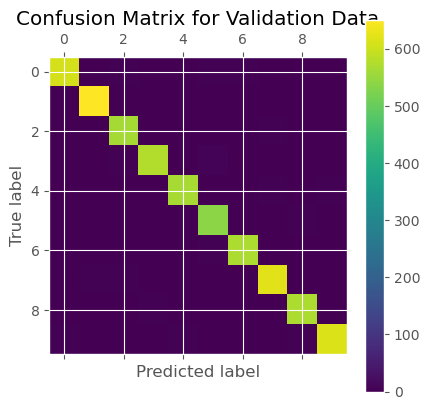


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data...

Accuracy of Classifier on Test Images:  0.9779

Creating Confusion Matrix for Test Data...

Confusion Matrix for Test Data: 
 [[ 972    0    1    0    0    3    1    1    2    0]
 [   0 1124    2    2    1    0    3    0    3    0]
 [   7    1 1009    0    2    0    4    6    3    0]
 [   0    2    1  986    0    7    0    6    6    2]
 [   3    0    2    0  965    0    3    0    0    9]
 [   2    1    0   14    1  863    3    1    6    1]
 [   4    5    2    0    3    7  935    0    2    0]
 [   0   11    8    2    1    0    0 1000    0    6]
 [   2    0    2    7    2    3    2    3  951    2]
 [   4    6    1    5   10    3    1    3    2  974]]


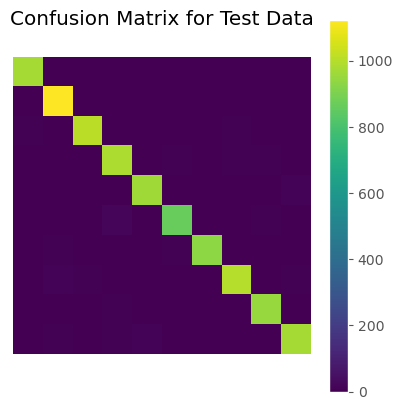

In [13]:
print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test, y_test)
print('\nSVM Trained Classifier Accuracy: ', acc)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy of Classifier on Validation Images: ', accuracy)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

In [14]:
sys.stdout = old_stdout
log_file.close()

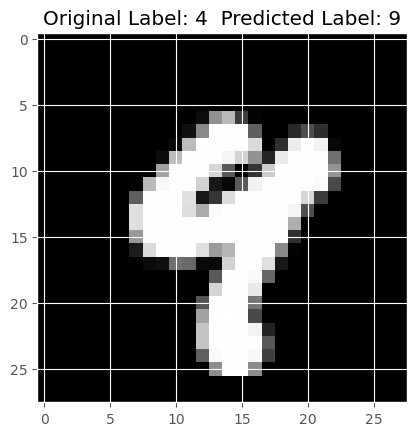

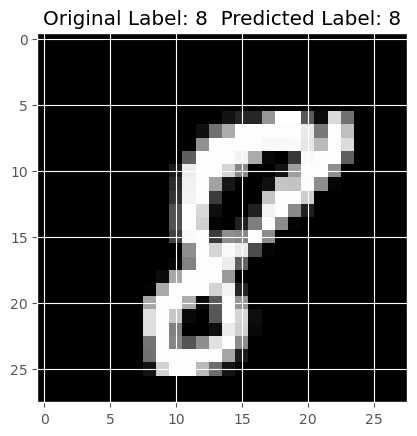

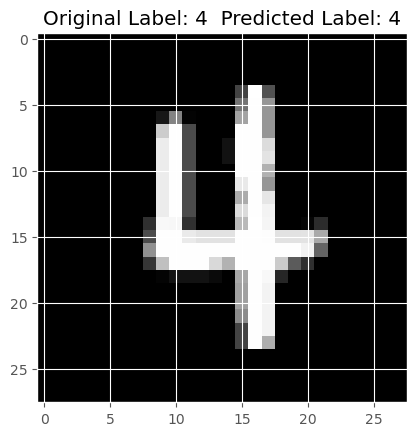

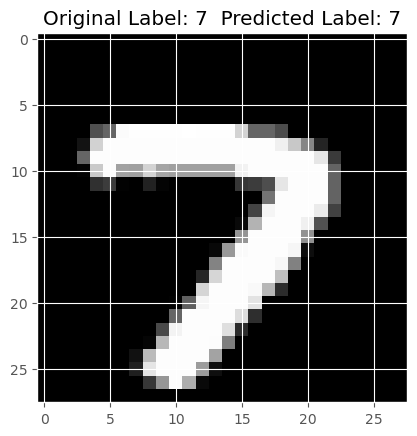

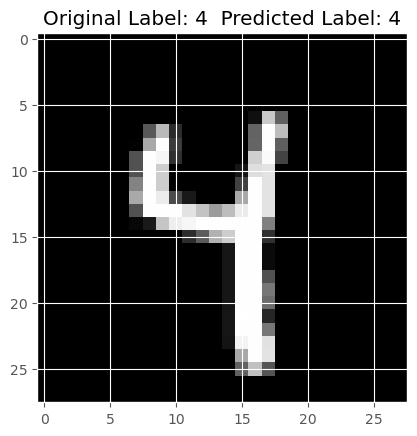

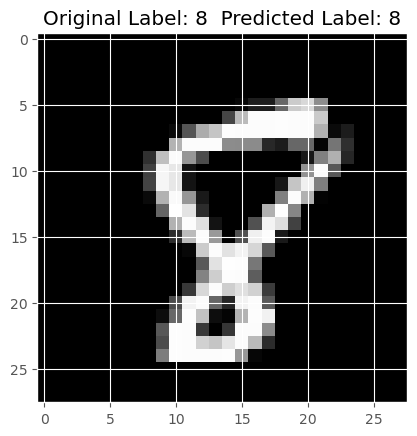

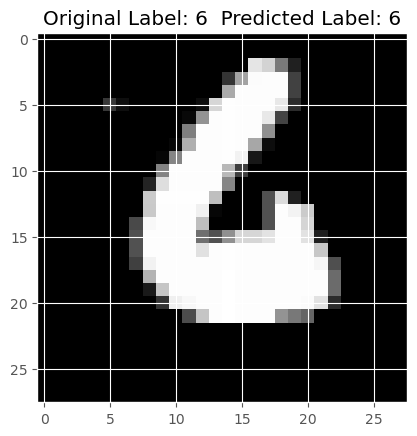

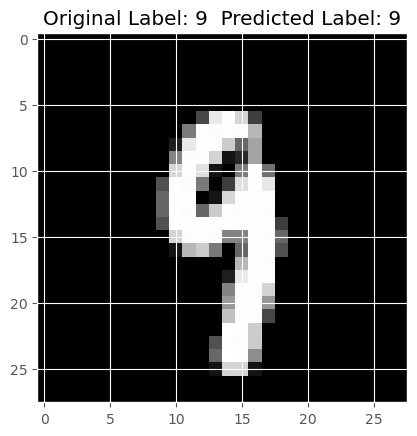

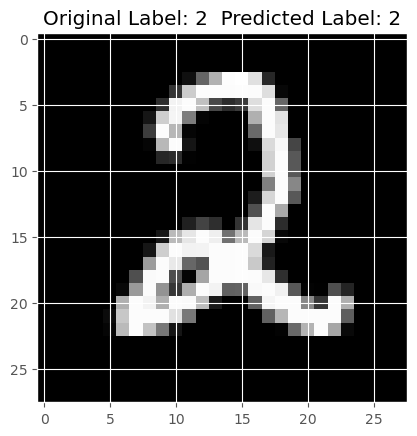

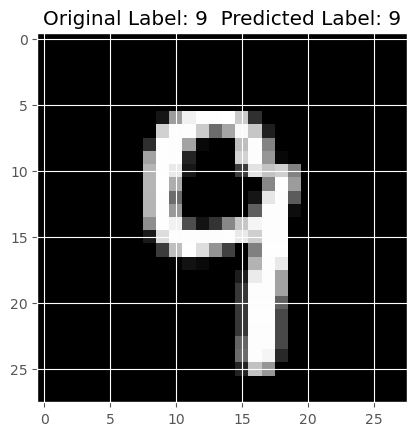

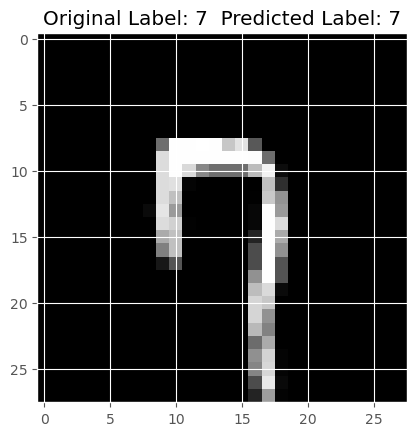

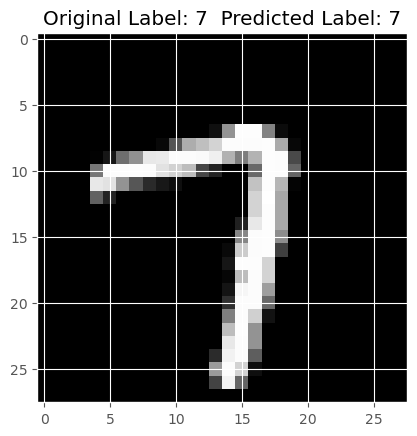

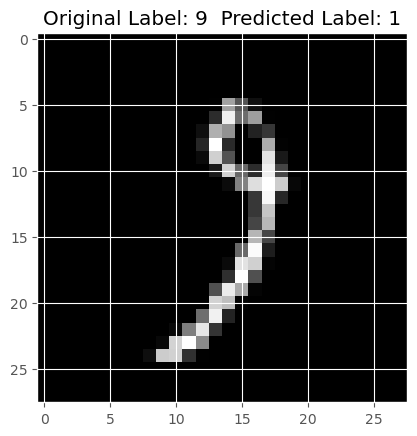

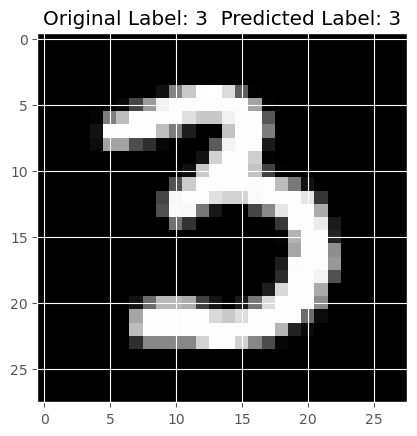

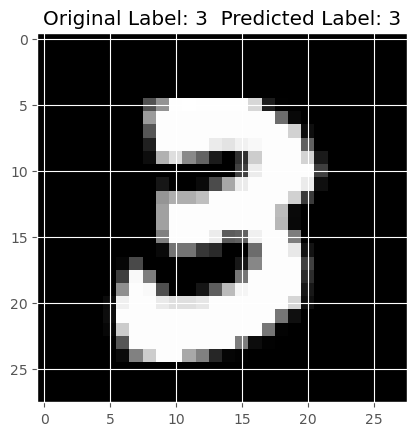

In [15]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(0, test_img.shape[0], 15)
for i in a:
    two_d = np.reshape(test_img[i], (28, 28))
    plt.title(f'Original Label: {test_labels[i]}  Predicted Label: {test_labels_pred[i]}')
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
#---------------------- EOC ---------------------#